In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import clean_dataset
from sklearn.impute import SimpleImputer
# Turn interactive plotting off
plt.ioff()

clean_dataset.clean_unsupervised()
# read input text and put data inside a data frame
data = pd.read_csv("../data/base_prospect_unsuppervised.csv",encoding="ISO-8859-1")
# prospect =  pd.DataFrame(prospect)
data['risque'] = data['risque'].astype(object)
data['ca_total_FL'] = data['ca_total_FL'].astype(object)
data['effectif'] = data['effectif'].astype(object)

data.head
data.dtypes

code_cr             object
dept                 int64
effectif            object
ca_total_FL         object
ca_export_FK       float64
risque              object
endettement        float64
evo_benefice       float64
ratio_benef        float64
evo_effectif       float64
evo_risque           int64
age                  int64
type_com            object
activite            object
actionnaire         object
forme_jur_simpl     object
chgt_dir             int64
rdv                  int64
dtype: object

In [3]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown="ignore")

feature_names  = data.columns.values[2:-1]
X = data[feature_names]
y = data["code_cr"]
#La liste des caisses régionales
lst_caisse=data['code_cr'].unique()

X_cat = X.select_dtypes(exclude=['float64','int64'])

# Disjonction with OneHotEncoder
# encoder.fit(X_cat)
# X_cat = encoder.transform(X_cat).toarray()

X_cat = pd.get_dummies(X_cat)
columns_cat = X_cat.columns
columns_cat

# X.dtypes

Index(['effectif_ETI', 'effectif_GE', 'effectif_MIC', 'effectif_PME',
       'ca_total_FL_ETI', 'ca_total_FL_GE', 'ca_total_FL_MIC',
       'ca_total_FL_PME', 'risque_eleve', 'risque_faible', 'risque_moyen',
       'type_com_Commune monopolarisÃ©e', 'type_com_Commune multipolarisÃ©e',
       'type_com_Espace Ã  dominante rurale', 'type_com_PÃ´le urbain',
       'activite_Commerce Autres',
       'activite_Commerce de gros et intermÃ©diaires du commerce',
       'activite_Construction : Autres',
       'activite_Construction : Travaux divers. Menuiserie. Miroiterie',
       'activite_Hotels et restaurants',
       'activite_Industrie alimentaire. bois.cuir',
       'activite_Industrie manufacturiÃ¨re : Autres',
       'activite_Industrie manufacturiÃ¨re : MÃ©tallurgie. travail des mÃ©taux',
       'activite_SantÃ© et action sociale. services sociaux. Ã©ducation. autres',
       'activite_Services. Location. Immobilier', 'activite_Transport',
       'actionnaire_entreprise', 'actionnaire

In [4]:
#Traitement des variable binaire et ordinale separement
# ordi_col = ["ca_total_FL"]

# X_ordinal = X[ordi_col]
# X_binaire = X.select_dtypes(exclude=['float64','int64']).drop(columns=ordi_col)

# encoder.fit(X_binaire)
# X_binaire = encoder.transform(X_binaire).toarray()

# X_cat = pd.concat([pd.DataFrame(X_binaire), X_ordinal], axis=1)

In [5]:
from sklearn.preprocessing import StandardScaler
# 3 - Cluster
# Normalize data
scaler = StandardScaler()
# TODO
X_num = X.select_dtypes(include=['float64','int64']).drop(columns=['chgt_dir'])
x_columns = X_num.columns

X_num_norm = scaler.fit_transform(X_num)
X_num_norm = pd.DataFrame(X_num_norm, columns=x_columns)
print(X_num_norm)



        ca_export_FK  endettement  evo_benefice  ratio_benef  evo_effectif  \
0          -0.116104     1.060530     -0.141338    -0.054267      0.016897   
1          -0.116104     0.090766     -0.040570    -0.023995     -0.097840   
2          -0.116104     2.345314     -0.080429     0.017692     -0.097840   
3          -0.116104     0.424407     -0.027918    -0.063576     -0.141726   
4          -0.089783     0.927162     -0.131051    -0.134005     -0.097840   
...              ...          ...           ...          ...           ...   
108432     -0.115988     0.349273      0.107963     0.082239     -0.164590   
108433     -0.075468     1.830317     -0.046728    -0.130480     -0.083134   
108434     -0.115988    -1.091474     -0.023967     0.021250     -0.083426   
108435      3.757681     0.554925      0.045573     0.091293     -0.097840   
108436      0.206904    -0.185686     -0.048981    -0.006871      0.029305   

        evo_risque       age  
0        -0.145329  2.375145  
1

In [6]:
columns_num_cat = pd.concat([X_num_norm, X_cat], axis=1).columns
X_num_cat = pd.concat([pd.DataFrame(X_num_norm), X_cat], axis=1).to_numpy()


print(pd.DataFrame(columns_num_cat))
from sklearn.cluster import KMeans


print(X.columns)
X_num_cat


matrice_corr = X.corr()

print("La matrice de corrélation est : \n", matrice_corr)


# Compute R-square, i.e. V_inter/V
from R_square_clustering import r_square
from purity import purity_score

# Plot elbow graphs for KMeans using R square and purity scores
lst_k=range(2,20)
lst_rsq = []
lst_purity = []
for k in lst_k:
    est=KMeans(n_clusters=k)
    est.fit(X_num_cat)
    lst_rsq.append(r_square(X_num_cat, est.cluster_centers_,est.labels_,k))
    # TODO: complete lst_purity
    
print(lst_purity, lst_rsq)
fig = plt.figure()
plt.plot(lst_k, lst_rsq, 'bx-')
plt.xlabel('k')
plt.ylabel('RSQ')
plt.title('The Elbow Method showing the optimal k')
plt.savefig('../fig/k-means_elbow_method')
plt.close()




                                                    0
0                                        ca_export_FK
1                                         endettement
2                                        evo_benefice
3                                         ratio_benef
4                                        evo_effectif
5                                          evo_risque
6                                                 age
7                                        effectif_ETI
8                                         effectif_GE
9                                        effectif_MIC
10                                       effectif_PME
11                                    ca_total_FL_ETI
12                                     ca_total_FL_GE
13                                    ca_total_FL_MIC
14                                    ca_total_FL_PME
15                                       risque_eleve
16                                      risque_faible
17                          

/tmp/ipykernel_97508/4293683978.py:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrice_corr = X.corr()
/home/fara/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/fara/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/fara/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn

[] [0.10109561210670695, 0.17574024245593786, 0.21968780398252186, 0.29227130723013234, 0.33120147672176553, 0.3791848231769235, 0.3972020361373433, 0.4354428920872855, 0.4610657543498724, 0.46692242067522677, 0.4771535540362243, 0.5027493000097234, 0.5125854084278855, 0.5317952411519217, 0.5330632374608476, 0.5499338315415739, 0.5554077908189508, 0.5596625851938547]


In [7]:
from time import time
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


def bench_k_means(kmeans, name, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    t0 = time()
    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(
            data,
            estimator[-1].labels_,
            metric="euclidean",
            sample_size=300,
        )
    ]

    # Show the results
    formatter_result = (
        "{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
    print(formatter_result.format(*results))

In [8]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

print(82 * "_")
print("init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")
n_cluster = 5
kmeans = KMeans(init="k-means++", n_clusters=n_cluster, n_init=15, random_state=0)
labels = kmeans.fit(X_num_cat).labels_

bench_k_means(kmeans=kmeans, name="k-means++", data=X_num_cat, labels=labels)

# pca = PCA(n_components=5).fit(X_num_cat)
# kmeans = KMeans(init=pca.components_, n_clusters=5, n_init=20)
# labels = kmeans.fit(X_num_cat).labels_

# bench_k_means(kmeans=kmeans, name="PCA-based", data=X_num_cat, labels=labels)

k_centroids = kmeans.cluster_centers_

# print(kmeans.cluster_centers_)
for index, centroid in enumerate(k_centroids):
    profiles = pd.DataFrame([centroid], columns=columns_num_cat).transpose().reset_index()
    # Rename the index column to the original column name
    # print(centroid,index)
    profiles.to_csv("../data/profile_{}.csv".format(index), index=False)

profiles = pd.DataFrame(k_centroids, columns=columns_num_cat).transpose().reset_index()
col = ["Profile_{}".format(i) for i in range(n_cluster)]
profiles_col = ["features"]
profiles_col.extend(col)
profiles.columns=profiles_col
# Rename the index column to the original column name
profiles.to_csv("../data/profile.csv", index=False)



__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	5.684s	4009404	0.554	0.474	0.511	0.552	0.511	0.119


In [9]:

n_clusters_mix = 60
kmeans_mixed = KMeans(init="k-means++", n_clusters=n_clusters_mix, n_init=20, random_state=0)
labels_mix = kmeans.fit(X_num_cat).labels_

bench_k_means(kmeans=kmeans_mixed, name="k-means++", data=X_num_cat, labels=labels)

k_centroids = kmeans_mixed.cluster_centers_
#hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage

lst_labels  = [i for i in range(0, n_clusters_mix)]

linkage_matrix = linkage(k_centroids, 'ward')


fig = plt.figure()
dendrogram(
    linkage_matrix,
    labels=lst_labels
)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.tight_layout()
plt.savefig('../fig/hierarchical-clustering')
plt.close()

k-means++	23.481s	1611668	0.503	0.141	0.220	0.045	0.220	-0.071


In [10]:
from sklearn.cluster import AgglomerativeClustering
n_cluster_cah = 9
print("Compute unstructured hierarchical clustering...")
ward = AgglomerativeClustering(n_clusters=n_cluster_cah, linkage="ward").fit(k_centroids)
labels = ward.labels_
print(f"Number of points: {labels.size}")


# silhouettes= metrics.silhouette_samples(k_centroids, labels)
silhouette_avg = metrics.silhouette_score(k_centroids, labels)
davies_bouldin_score=metrics.davies_bouldin_score(k_centroids, labels)
print("test",metrics.calinski_harabasz_score(k_centroids, labels))

# print("Les indices de silhouettes :", silhouettes)

print("L'indice de silhouette moyen est :", silhouette_avg)
print("L'indice de davies_bouldin_score moyen est :", davies_bouldin_score)
ward.children_


Compute unstructured hierarchical clustering...
Number of points: 60
test 181.04714679831378
L'indice de silhouette moyen est : 0.7442955618259623
L'indice de davies_bouldin_score moyen est : 0.07194006481151227


array([[  2,  46],
       [ 17,  42],
       [  4,  54],
       [ 16,  51],
       [  0,  50],
       [ 19,  47],
       [ 44,  49],
       [ 14,  38],
       [  8,  48],
       [ 31,  58],
       [ 30,  52],
       [ 21,  40],
       [  1,  36],
       [ 27,  53],
       [ 33,  69],
       [ 26,  68],
       [  6,  74],
       [ 13,  55],
       [ 24,  70],
       [  7,  73],
       [ 25,  39],
       [ 12,  59],
       [ 23,  32],
       [ 11,  43],
       [ 57,  61],
       [ 41,  66],
       [ 34,  78],
       [ 60,  72],
       [ 67,  87],
       [ 63,  64],
       [ 62,  88],
       [ 75,  81],
       [ 28,  82],
       [ 89,  91],
       [ 83,  92],
       [ 76,  93],
       [ 79,  95],
       [ 90,  94],
       [ 80,  97],
       [ 85,  98],
       [ 65,  99],
       [ 71,  96],
       [ 84, 101],
       [ 86, 102],
       [ 20, 103],
       [ 77, 100],
       [  3,  45],
       [104, 105],
       [ 56, 107],
       [106, 108],
       [ 10, 109],
       [ 35, 110],
       [ 18,

In [11]:
from scipy.cluster.hierarchy import ward, fcluster


classes =fcluster(linkage_matrix, t=n_cluster_cah, criterion='maxclust')
classes
classes_indice = []
for i in range(1,n_cluster_cah+1):
    classes_indice.append(k_centroids[[j for j, val in enumerate(classes) if val == i]])
profil_cah = pd.DataFrame(classes_indice[0], columns=columns_num_cat).mean(axis=0)
arr = []
for i in range(0,n_cluster_cah):
    # print(classes_indice[i])
    arr.append(pd.DataFrame(classes_indice[i]).mean(axis=0).values)

profile_cah = pd.DataFrame(arr,columns=columns_num_cat).transpose().reset_index()
profile_cah.to_csv("../data/profile_cah.csv", index=False)

# profil_cah = pd.concat([profil_cah,pd.DataFrame(classes_indice[i], columns=columns_num_cat).mean(axis=0)])
# profil_cah
# classes_indice

[array([[-0.00911993, -0.17699595,  0.03368793, ..., -0.01424514,
         -0.11002571,  0.45696197],
        [-0.10549994,  0.19974175, -0.0509226 , ..., -0.01424514,
         -0.11002571, -0.28802043],
        [-0.10898724,  0.08329183, -0.0230105 , ..., -0.01424514,
         -0.11002571, -0.35650329],
        ...,
        [-0.11219667, -0.00529706, -0.01589731, ..., -0.01424514,
         -0.11002571, -0.42284408],
        [-0.01517463, -0.05105364, -0.02127065, ..., -0.01424514,
         -0.11002571,  0.58918354],
        [-0.08318056, -0.09492167,  0.00330102, ..., -0.01424514,
         -0.11002571,  0.17694279]]),
 array([[-1.15231270e-01, -6.34593378e+01, -4.85151206e-02,
         -3.93446336e-01, -2.37575471e-02, -3.80631281e-01,
         -1.03220038e+00, -1.24150247e-01, -1.48786984e-02,
          1.14761924e+00, -1.11229415e+00, -1.24150247e-01,
         -1.48786984e-02,  1.14761924e+00, -1.11229415e+00,
          5.83263239e-01, -4.79538209e-02, -5.63373705e-01,
         -3.5

Dans cette section nous allons représenter dans une graphe de coordonnées parallèle les différentes classes obtenues 
par la méthode CAH. Pour ce faire, étant donné que les colonnes sont nombreuses et que la visualisation sera mauvaise,
nous avons identifié et séléctionné que les attributs qui ont une forte valeur positivement et négativement dont :
'evo_effectif','evo_benefice','forme_jur_simpl_SociÃ©tÃ© civile','ca_export_FK','effectif_GE','ca_total_FL_GE','forme_jur_simpl_Forme juridique agricole','ratio_benef','endettement'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 48 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   index                                                                    9 non-null      int64  
 1   ca_export_FK                                                             9 non-null      float64
 2   endettement                                                              9 non-null      float64
 3   evo_benefice                                                             9 non-null      float64
 4   ratio_benef                                                              9 non-null      float64
 5   evo_effectif                                                             9 non-null      float64
 6   evo_risque                                                               9 non

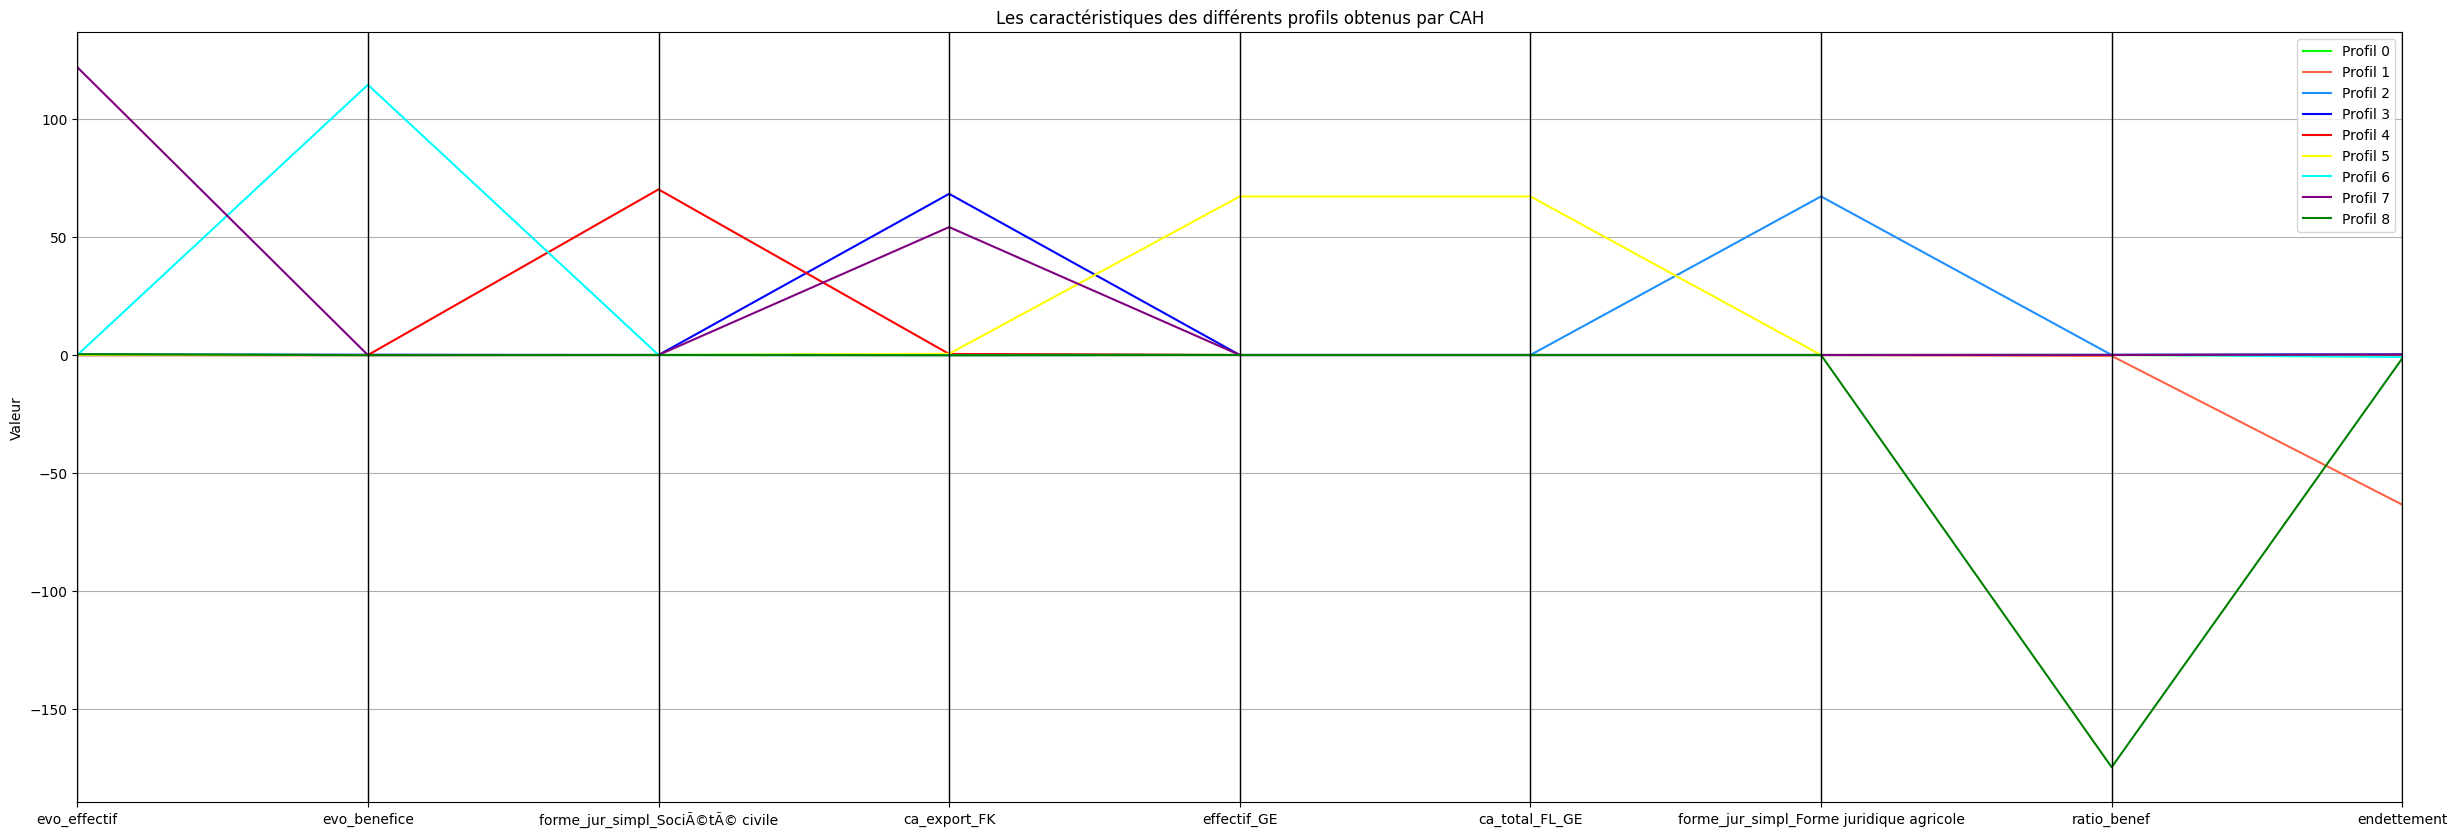

In [38]:
import pandas as pd

profile_cah_ = pd.DataFrame(arr,columns=columns_num_cat).reset_index()
arr_title = []
for i in range(len(profile_cah_)):
    arr_title.append("Profil "+str(i))
profile_cah_['profil_name'] = arr_title
print(profile_cah_.info())
profile_cah_.to_csv('../data/profile_cah_not_transposed.csv')

# Prendre les colonnes avec une valeur maximale positivement
max_values = profile_cah_.max()
print(max_values.sort_values(ascending=False)[0:10])

# Prendre les colonnes avec une valeur maximale négativement
min_values = profile_cah_.min()
print(min_values.sort_values(ascending=True)[0:10])

profile_cah_ = profile_cah_[['evo_effectif','evo_benefice','forme_jur_simpl_SociÃ©tÃ© civile','ca_export_FK','effectif_GE','ca_total_FL_GE','forme_jur_simpl_Forme juridique agricole','ratio_benef','endettement','profil_name']]

# Graphe sur les coordonnées parallèles pour présenter les classes obtenues avec CAH 
plt.figure(figsize=(30,10))
plt.title("Les caractéristiques des différents profils obtenus par CAH")
plt.ylabel('Valeur')
plt.legend()
pd.plotting.parallel_coordinates(profile_cah_, 'profil_name', color=["lime", "tomato","dodgerblue","blue","red","yellow","cyan","purple","green"])
plt.show()
plt.savefig("../fig/cah_classes.png")